
<div style="background-color:#035FCA; color:#19180F; font-size:40px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> T5 </div>
<div style="background-color:#568FD1; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> Architecture Overview.
 </div>
<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
At a high level, T5 is built using a transformer based architecture. It is different from other architectures like BERT, RoBERTa, GPT-2 and XLNET in several ways.<br>

- The building blocks of T5 are similar to those of other transformer based models. It consists of an encoder and a decoder. The encoder takes in the input seq and generates a hidden representation of the input. The decoder takes in the hidden representation and generates the output sequence.<br>

- The encoder and decoder are connected by an attention mechanism that allows the decoder to attend to different parts of the input sequence.<br>

- One of the key differences between T5 and other architectures like BERT,RoBERTa, GPT2 and XLNet is that T5 is a text to text model. This means that it can be trained on a wide range of nlp taks by simply changing the input and output format.<br> 

- For example, It can be trained on machine translation by providing it with a source language sentence and a target language sentence as input-output pair. It can also be trained on summarization by providing it with a long document as input and short summary as output.
<br>
- T5 uses a pretraining and fine tuning approach. During pre-training, T5 is trained on a large corpus of text using a masked language modelling objective whereas during the fine tuning stage, The pre-trained model is fine tuned on a specific task by providing it with task-specific input and output pairs.<br>

- T5 also uses a technique called task-specific prompts, which allows it to perform well on a wide range of tasks with minimal task specific training. The prompts are short text strings that are concatenated to the input sequence to provide task specific information to the model.<br>


<div style="background-color:#568FD1; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> Architecture Diagram.
 </div>
<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
    
1. Input Layer: This layer represents the input text that is to be processed by the T5 model.<br>

2. Tokenizer: The input text is passed through the tokenizer, which converts it into a sequence of tokens. The tokenizer breaks down the text into meaningful units, such as words or subwords, and assigns a unique token to each unit.<br>

3. Tokens: The tokens obtained from the tokenizer are represented in this block. These tokenized representations of the input text form the input for the subsequent layers.<br>

4. Encoder-Decoder Layers: This section includes the encoder and decoder components of the T5 model.<br>

   a. Encoder: The encoder processes the tokenized input text. It consists of several layers, each containing a self-attention mechanism followed by a feed-forward network. The self-attention mechanism allows the model to weigh the importance of different tokens in the input sequence, capturing the relationships between them. The feed-forward network helps in transforming the representation of each token. Residual connections and layer normalization are applied within each encoder layer to improve the flow of information and stabilize the learning process.<br>

   b. Decoder: The decoder takes as input the outputs from the encoder and is responsible for generating the output sequence. It also consists of multiple layers, each comprising a self-attention mechanism, an encoder-decoder attention mechanism to capture relevant information from the encoder outputs, and a feed-forward network. Similar to the encoder, residual connections and layer normalization are applied within each decoder layer.<br>

5. Output Layer: This layer represents the generated output text. It is the result of the decoding process in the T5 model.<br>

The connections between the different components illustrate the flow of information through the model. The input text is passed through the tokenizer, and the resulting tokens are fed into the encoder. The encoder processes the tokens and produces representations, which are then used by the decoder. The decoder generates the output sequence, which is represented in the output layer.<br></div>

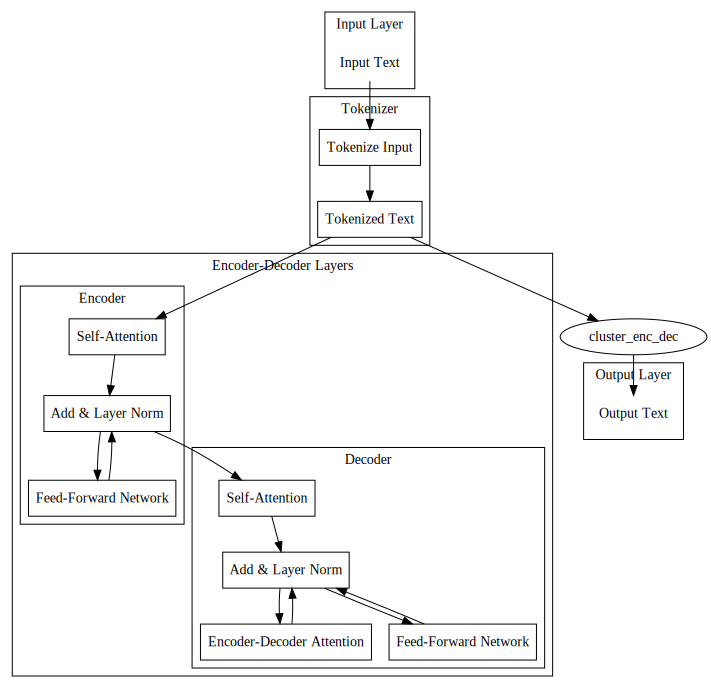

In [19]:
from IPython.display import SVG, display

# Load the SVG file and display it
svg_file = '/kaggle/input/notebook-images/t5.svg'
display(SVG(filename=svg_file))

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">Importing modules
</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from transformers import T5Tokenizer, TFT5Model
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Defining the num of gpus to be used </div>

In [2]:
num_gpus = 2


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The following code snippets loads the training and test data from CSV files using pandas and splits the training data into input (question + answer) and target variables.
</div>    


In [3]:
train_data = pd.read_csv('/kaggle/input/google-quest-challenge/train.csv')
test_data = pd.read_csv('/kaggle/input/google-quest-challenge/test.csv')


In [4]:
X = train_data['question_title'] + ' ' + train_data['question_body'] + ' ' + train_data['answer']
y = train_data.iloc[:, 11:]


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">

The input data is tokenized using the T5 tokenizer from the Transformers library. The tokenizer converts the text into a numerical representation suitable for input to the T5 model.</div>

In [5]:
# Tokenize the input data
tokenizer = T5Tokenizer.from_pretrained('t5-base')
X_encoded = tokenizer.batch_encode_plus(
    X.tolist(),
    padding='longest',
    truncation=True,
    return_tensors='tf'
)

/opt/conda/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The tokenized input data and target variables are split into training and validation sets using the train_test_split function from scikit-learn.
</div>    


In [6]:
# Convert the tensor array to a numpy array of integers
X_encoded_ids = np.array(X_encoded['input_ids'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded_ids, y, test_size=0.2, random_state=42)


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
This snippet defines the architecture of the T5 model using the TFT5Model class from the Transformers library. The model takes the tokenized input IDs as input and produces a sequence of hidden states. The final hidden state corresponding to the first token is extracted and passed through a dense layer with sigmoid activation to obtain the model's output.
</div>    


In [7]:
# Define the T5 model architecture
input_ids = Input(shape=(X_encoded['input_ids'].shape[1],), dtype='int32')
decoder_input_ids = Input(shape=(X_encoded['input_ids'].shape[1],), dtype='int32')
t5_model = TFT5Model.from_pretrained('t5-base')
output = t5_model(input_ids=input_ids, decoder_input_ids=decoder_input_ids).last_hidden_state[:, 0, :]
output = Dense(y_train.shape[1], activation='sigmoid')(output)
model = Model(inputs=[input_ids, decoder_input_ids], outputs=output)


All PyTorch model weights were used when initializing TFT5Model.

All the weights of TFT5Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5Model for predictions without further training.


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The model is compiled with the Adam optimizer and binary cross-entropy loss. It is then trained on the training data using the fit method, with the validation data used for monitoring the model's performance during training.</div>



In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy')


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
A distribution strategy is defined to enable multi-GPU training. The MirroredStrategy from TensorFlow is used, which replicates the model across multiple GPUs and synchronizes their updates.
</div>    


In [9]:
# Define the distribution strategy for multi-GPU training
strategy = tf.distribute.MirroredStrategy()


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The model is wrapped with the distribution strategy using the strategy.scope() context manager, which creates the distributed model and compiles it. This allows the model to be trained on multiple GPUs.
</div>

   

In [10]:
# Create and compile the distributed model
with strategy.scope():
    distributed_model = model


In [11]:
# Compile and train the model
distributed_model.compile(optimizer='adam', loss='binary_crossentropy')
distributed_model.fit(
    [X_train, X_train],
    y_train,
    validation_data=([X_val, X_val], y_val),
    batch_size=1 * strategy.num_replicas_in_sync,
    epochs=1
)

2432/2432 [==============================] - 1635s 642ms/step - loss: 0.4144 - val_loss: 0.4052


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The test data is tokenized using the same tokenizer used for the training data. The tokenized input IDs are then passed to the trained distributed model to make predictions on the test data.</div>

In [12]:
# Tokenize the test data
X_test = test_data['question_title'] + ' ' + test_data['question_body'] + ' ' + test_data['answer']
X_test_encoded = tokenizer.batch_encode_plus(
    X_test.tolist(),
    padding='longest',
    truncation=True,
    return_tensors='tf'
)

In [13]:
# Convert the tensor array to a numpy array of integers
X_test_encoded_ids = np.array(X_test_encoded['input_ids'])


In [14]:
# Make predictions on the test data
predictions = distributed_model.predict([X_test_encoded_ids, X_test_encoded_ids])


15/15 [==============================] - 47s 3s/step


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The predicted values are used to create a DataFrame for the submission file. The predictions are organized in columns corresponding to the target variables, and the qa_id column from the test data is included for identification.</div>

In [15]:
# Create a DataFrame for the submission file
submission_df = pd.DataFrame(predictions, columns=y_train.columns)
submission_df.insert(0, 'qa_id', test_data['qa_id'])


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
The submission DataFrame is saved as a CSV file named "submission.csv" without including the index column.</div>

In [16]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [17]:
submission_df

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.925472,0.749821,0.113638,0.763708,0.714202,0.707339,0.681175,0.611606,0.300275,...,0.885827,0.918610,0.675812,0.952385,0.965131,0.851143,0.193529,0.091380,0.572007,0.922787
1,46,0.857872,0.519394,0.014608,0.721294,0.785923,0.851384,0.566530,0.435812,0.175089,...,0.732898,0.948181,0.667617,0.970629,0.979528,0.886912,0.745296,0.125198,0.467727,0.917758
2,70,0.924793,0.740343,0.122803,0.726969,0.709181,0.703232,0.671121,0.597929,0.289076,...,0.882591,0.902143,0.665981,0.944119,0.956353,0.843788,0.198007,0.098120,0.580198,0.912617
3,132,0.865061,0.517303,0.009042,0.720124,0.786819,0.856836,0.558204,0.417571,0.142056,...,0.722715,0.954710,0.662942,0.975540,0.982992,0.889610,0.801359,0.123226,0.433160,0.920122
4,200,0.913985,0.651699,0.094470,0.706027,0.683450,0.656764,0.645682,0.581313,0.318228,...,0.822887,0.908777,0.664382,0.946114,0.959311,0.833658,0.285771,0.123592,0.551567,0.911655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,9569,0.888979,0.574700,0.023743,0.695837,0.744091,0.768347,0.587762,0.482918,0.203907,...,0.766584,0.939587,0.659721,0.965172,0.975156,0.864806,0.660653,0.140083,0.462654,0.913447
472,9590,0.862380,0.514621,0.006702,0.729544,0.802338,0.877330,0.548557,0.396558,0.123524,...,0.716780,0.958904,0.663152,0.978092,0.984923,0.898048,0.837145,0.117742,0.412991,0.920057
473,9597,0.901031,0.598261,0.063027,0.709439,0.679836,0.674037,0.623549,0.555399,0.300314,...,0.789879,0.920005,0.666057,0.953035,0.964848,0.834566,0.387828,0.134454,0.530733,0.912921
474,9623,0.920093,0.732291,0.104342,0.728492,0.724560,0.729168,0.663263,0.582019,0.274256,...,0.878721,0.908156,0.665253,0.947283,0.958930,0.850710,0.237153,0.097485,0.566745,0.913482
